In [3]:
import pandas as pd

column_names = ['id', 'game_name', 'sentiment', 'comment']
df = pd.read_csv('twitter_training.csv', names =column_names)

df.head()

,id,game_name,sentiment,comment
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
sentiment_frequency = df['sentiment'].value_counts(normalize=True)
sentiment_frequency

sentiment
Negative      0.301840
Positive      0.278943
Neutral       0.245280
Irrelevant    0.173937
Name: proportion, dtype: float64

In [9]:
game_name_frequency = df['game_name'].value_counts(normalize=True)
game_name_frequency

game_name
TomClancysRainbowSix                 0.032136
MaddenNFL                            0.032136
Microsoft                            0.032136
LeagueOfLegends                      0.032056
CallOfDuty                           0.032056
Verizon                              0.031895
CallOfDutyBlackopsColdWar            0.031815
ApexLegends                          0.031815
Facebook                             0.031735
WorldOfCraft                         0.031654
Dota2                                0.031654
NBA2K                                0.031494
TomClancysGhostRecon                 0.031413
Battlefield                          0.031413
FIFA                                 0.031333
Xbox(Xseries)                        0.031253
Overwatch                            0.031253
johnson&johnson                      0.031172
Amazon                               0.031011
PlayStation5(PS5)                    0.030931
HomeDepot                            0.030931
Cyberpunk2077           

In [10]:
import pandas as pd
import numpy as np

new_sentiment_values = np.random.choice(
    sentiment_frequency.index, 
    size=1_000_000, 
    p=sentiment_frequency.values
)

new_game_name_values = np.random.choice(
    game_name_frequency.index, 
    size=1_000_000, 
    p=game_name_frequency.values
)
new_df = pd.DataFrame({'sentiment': new_sentiment_values, 'game_name': new_game_name_values})

new_df.head()

,sentiment,game_name
0,Irrelevant,Overwatch
1,Neutral,HomeDepot
2,Neutral,TomClancysRainbowSix
3,Neutral,ApexLegends
4,Irrelevant,Overwatch


In [11]:
new_df['sentiment'].value_counts(normalize=True)

sentiment
Negative      0.301639
Positive      0.279669
Neutral       0.244943
Irrelevant    0.173749
Name: proportion, dtype: float64

In [13]:
new_df['game_name'].value_counts(normalize=True)


game_name
LeagueOfLegends                      0.032312
ApexLegends                          0.032145
TomClancysRainbowSix                 0.032049
MaddenNFL                            0.032012
CallOfDuty                           0.031944
Verizon                              0.031941
CallOfDutyBlackopsColdWar            0.031927
Microsoft                            0.031891
WorldOfCraft                         0.031745
Facebook                             0.031645
TomClancysGhostRecon                 0.031610
Dota2                                0.031602
NBA2K                                0.031575
FIFA                                 0.031391
Battlefield                          0.031355
Overwatch                            0.031322
Xbox(Xseries)                        0.031289
Amazon                               0.031273
johnson&johnson                      0.031235
Cyberpunk2077                        0.030989
CS-GO                                0.030893
HomeDepot               

In [14]:
sentiment_map = {
    'Irrelevant': 0,
    'Neutral': 1,
    'Positive': 2,
    'Negative': 3
}

new_df['sentiment'] = new_df['sentiment'].replace(sentiment_map)
new_df.head()

/var/folders/3c/xpn63_zx60zfp8q71qd10x7w0000gn/T/ipykernel_54601/3712762710.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df['sentiment'] = new_df['sentiment'].replace(sentiment_map)


,sentiment,game_name
0,0,Overwatch
1,1,HomeDepot
2,1,TomClancysRainbowSix
3,1,ApexLegends
4,0,Overwatch


In [15]:
from datetime import datetime, timedelta
import random

random.seed(9)


def gen_timestamp():
    return datetime.now() + timedelta(milliseconds=random.randint(0, 20 * 60 * 1000))


new_df['timestamp'] = [gen_timestamp() for _ in range(len(new_df))]
new_df.head()

,sentiment,game_name,timestamp
0,0,Overwatch,2024-12-29 19:21:54.762812
1,1,HomeDepot,2024-12-29 19:18:46.657842
2,1,TomClancysRainbowSix,2024-12-29 19:15:03.987847
3,1,ApexLegends,2024-12-29 19:10:34.304850
4,0,Overwatch,2024-12-29 19:12:14.140851


In [21]:
new_df['id'] = range(1, len(new_df) + 1)
new_df = new_df[['id', 'game_name', 'sentiment', 'timestamp']]
new_df = new_df.sort_values(by='timestamp', ascending=True)

new_df.head()

,id,game_name,sentiment,timestamp
40238,40239,Google,2,2024-12-29 19:05:43.827487
21708,21709,Dota2,2,2024-12-29 19:05:43.834474
49099,49100,WorldOfCraft,2,2024-12-29 19:05:43.855795
23292,23293,CS-GO,3,2024-12-29 19:05:43.890403
26840,26841,CallOfDuty,2,2024-12-29 19:05:43.892628


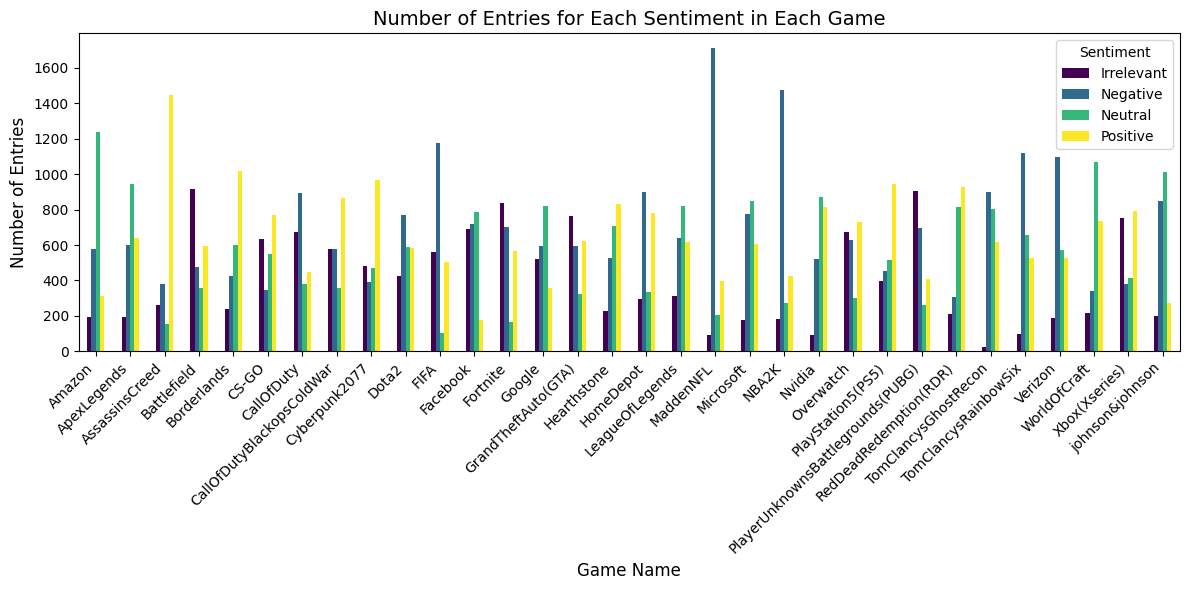

In [24]:
import matplotlib.pyplot as plt

# Group by 'game_name' and 'sentiment', and count the number of entries
grouped_data = df.groupby(['game_name', 'sentiment']).size().unstack(fill_value=0)

# Plot the data
grouped_data.plot(kind='bar', stacked=False, figsize=(12, 6), colormap='viridis')

# Customize the plot
plt.title('Number of Entries for Each Sentiment in Each Game', fontsize=14)
plt.xlabel('Game Name', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.legend(title='Sentiment', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [22]:
new_df.to_csv('twitter.csv', index=False)

In [25]:
new_df.dtypes

id                    int64
game_name            object
sentiment             int64
timestamp    datetime64[ns]
dtype: object